#   <center> Money Transaction</center>         

## Introduction 
----

Financial fraud is a significant issue faced by many businesses, causing losses in revenue and customer trust.this is a comprehensive dataset that provides valuable insights into the world of financial transactions. The dataset contains information about various financial transactions such as cash-in, cash-out, debit, payment, and transfer, along with the amount of the transaction, the customer who initiated the transaction, and the recipient of the transaction. In addition, the dataset includes columns that indicate the initial and final balance of the customer and the recipient of the transaction.

we can gain a better understanding of the behavior of customers and identify any patterns or anomalies that could indicate risky behavior. The insights that can be gained from this dataset can be used to assess the risk associated with financial transactions and help organizations to make better decisions.

----

## Methodology
----

We started our analysis by extrating initial 5000 rows of data and creating various visuals. so, that we can find out which visuals are going to be useful for our analysis. for exploring 5000 rows of data we used Excel and Tableau.

To explore the relationships between the variables and identify any patterns or anomalies that may be indicative of fraudulent activity. We will use Python libraries such as pandas, matplotlib, sweetviz, and seaborn for data manipulation and visualization.

----


## Data Exploration



In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#important libraries for data analysis and visualization

In [2]:
DF = pd.read_csv('Transactions DataSet.csv')

In [3]:
DF

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Headers


step - maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount -
amount of the transaction in local currency.

nameOrig - customer who started the transaction

oldbalanceOrg - initial balance before the transaction

newbalanceOrig - new balance after the transaction

nameDest - customer who is the recipient of the transaction

oldbalanceDest - initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

newbalanceDest - new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

isFraud - This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

isFlaggedFraud - The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

----

In [3]:
#To delete isFraud and isFlaggedFraud columns

DF.drop(DF.columns[[9,10]], axis=1, inplace=True)

In [4]:
DF.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


In [5]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 436.9+ MB


In [6]:
DF.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08


## Data Analysis

In [7]:
# pip install sweetviz   # for installation of sweetviz libraries

import sweetviz as sv   #for having quick summarization of data

my_report = sv.analyze(DF)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

                                             |          | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


##  Heatmap for  relationship of data
----
The heatmap displays the correlation coefficients between all pairs of features in the dataset using a color scale.

----

<AxesSubplot:>

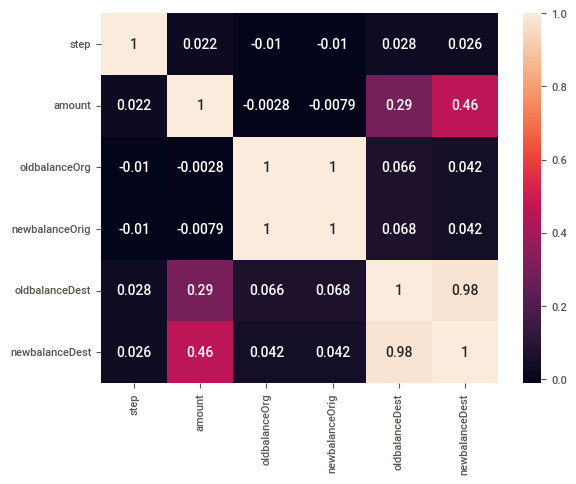

In [8]:
# creating a heatmap for observing relation between data

sns.heatmap(DF.corr(),annot=True)

----

The heatmap provides a useful visualization of the correlation between the features in the dataset. It highlights the strong and weak correlations between features, which can be valuable in understanding the relationships between variables and developing predictive models.

Here we find out that oldbalanceOrg	and newbalanceOrig has strong correlation and oldbalanceDest and newbalanceDest also has strong correlation.

----

## Boxplot of Transaction Amount by Type
----
The boxplot is a useful visualization technique that shows the distribution of the transaction amount for each transaction type in the dataset.we used the seaborn library in Python. We first imported the dataset and plotted the transaction amount by type using the boxplot function in seaborn. 

----


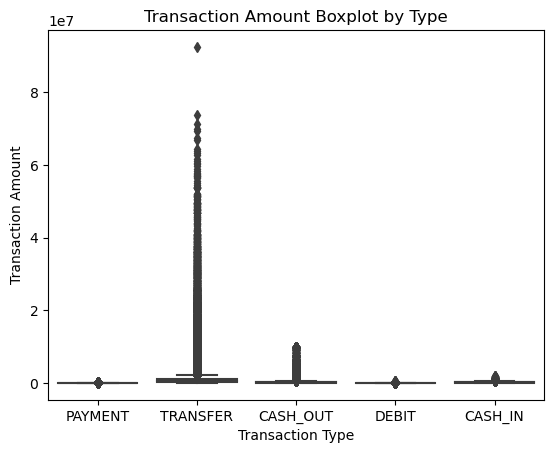

In [34]:
#creating a box plot for type of transaction by amount
sns.boxplot(data=DF, x='type', y='amount')

plt.title('Transaction Amount Boxplot by Type')

plt.xlabel('Transaction Type')

plt.ylabel('Transaction Amount')

plt.show()

----

We observed that PAYMENT transactions had the lowest median transaction amount. we also saw that there were lots of outliers in the TRANSFER and CASH_OUT type transaction, which could indicate potential fraudulent activity.
This information can be valuable in identifying potential fraudulent activity, as unusual transaction amounts outside of the expected range for a given transaction type may indicate fraudulent behavior.

----

## histogram of the amount
-----
The frequency of transactions then decreases rapidly as the transaction amount increases, with only a small number of transactions falling into the higher-value bins.

-----

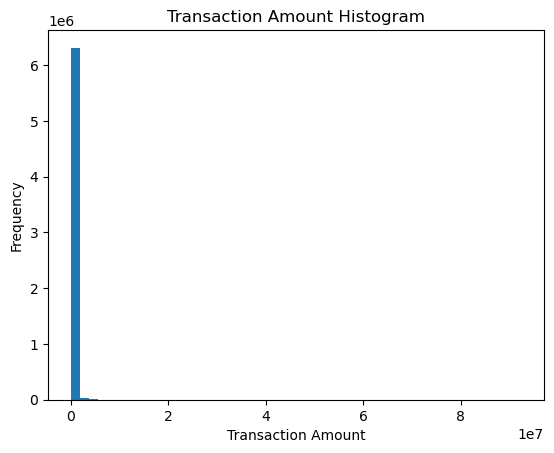

In [35]:
# creating a histogram for amount
plt.hist(DF['amount'], bins=50)

plt.title('Transaction Amount Histogram')

plt.xlabel('Transaction Amount')

plt.ylabel('Frequency')

plt.show()

----

The information can be valuable in understanding the distribution of transaction amounts and identifying potential fraudulent activity. it shows that below 10 millions amount has highest frequency of transaction.

----

## Scatter Plot of Transaction Amount vs. Step by Type
----
there is a wide range of transaction amounts across all steps in the dataset.The scatter plot also shows that there are some patterns in the relationship between transaction amount and step, depending on the transaction type.

----



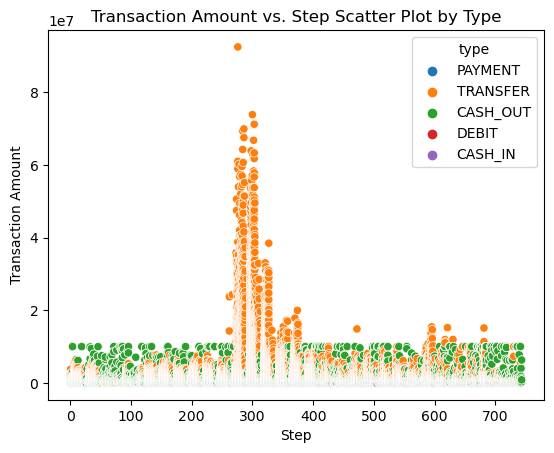

In [4]:
# Create a scatter plot of transaction amount vs. step by type
sns.scatterplot(data=DF, x='step', y='amount', hue='type')

# Set the title of the chart
plt.title('Transaction Amount vs. Step Scatter Plot by Type')

# Set the x-axis label
plt.xlabel('Step')

# Set the y-axis label
plt.ylabel('Transaction Amount')

# Display the chart
plt.show()

----

the above code provides a useful visualization of the relationship between transaction amount and step in the dataset, differentiated by transaction type.It highlights the differences in transaction amount distribution between transaction types and provides insights into the patterns of transaction activity over time.

Here we find out that TRANSFER type transaction has highest amount of transaction and this high amount of transaction take around 270 to 380 hours of time. And we also see that TRANSFER and CASH_OUT are mostly highlighted and this kind transaction can take time from 1 day to 31 days.

----

## Pie Chart of Transaction Type Ratio
----
The pie chart shows each transaction type as a slice of the pie, with the size of each slice representing the proportion of that transaction type in the dataset.

-----

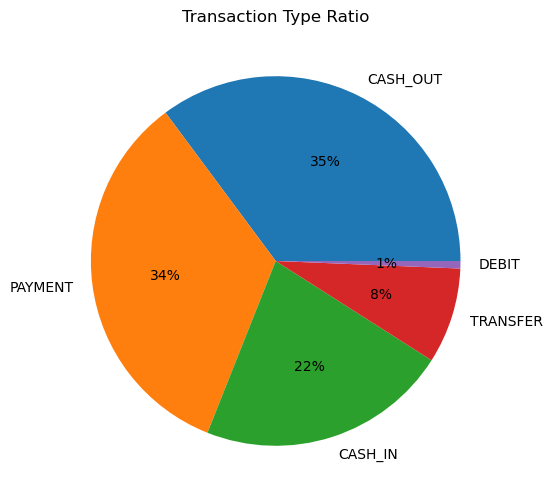

In [4]:
# making a piechart for type of transaction
type = DF['type'].value_counts()
transaction = type.index
count = type.values

# piechart
plt.figure(figsize=(6,6))
plt.pie(count, labels=transaction, autopct='%1.0f%%')
plt.title('Transaction Type Ratio')
plt.show()

----
we can observe that the most common transaction type in the dataset is 'CASH-OUT', accounting for 35% of all transactions. 'PAYMENT' transactions follow this at 34% and 'CASH-IN' transactions at 22%. 'TRANSFER' and 'DEBIT' transactions are relatively rare, accounting for only 8% and 1% of all transactions, respectively.

----

##  Origin Account Balance vs. New Balance Scatter Plot by Type

----
This indicates that in most transactions, the old balance of the sender is decreasing by some amount, and the new balance is increasing by a similar amount.

----

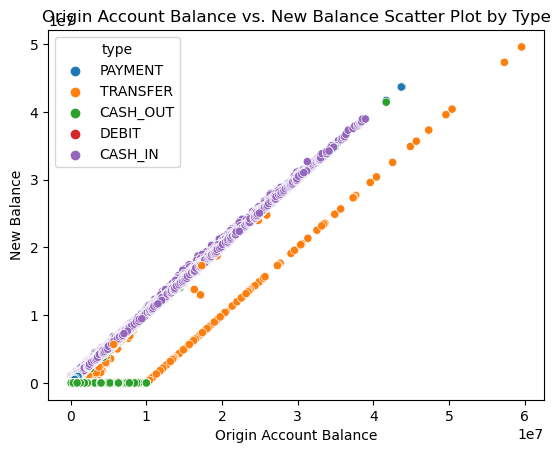

In [5]:
# Creating a scatter plot for old balance vs new balance for Sender
sns.scatterplot(data=DF , x='oldbalanceOrg', y='newbalanceOrig', hue='type')

plt.title('Origin Account Balance vs. New Balance Scatter Plot by Type')

plt.xlabel('Origin Account Balance')

plt.ylabel('New Balance')

plt.show()

-----
The scatter plot created using the above code provides a clear visualization of the relationship between old and new balances for sender accounts in the dataset. It highlights the differences in this relationship between different transaction types, providing insights into the patterns of transactions in the dataset.

Its shows thatin cash out method most of the times new balance becomes zero and in transfer method we see big difference between new balance and old balance.

----

## Bar Chart of Transaction Type vs Amount
----
The bar chart represents the total sum of transaction amount for each transaction type. The data used for this visualization has been grouped by transaction type, and the total amount for each type has been calculated.

----

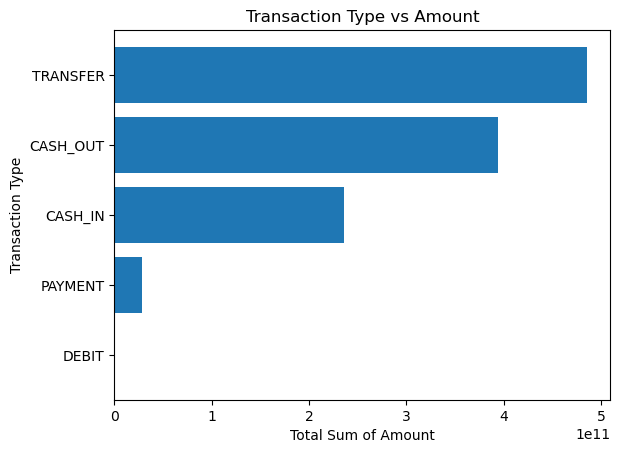

In [5]:
# Creating a bar chart for Transaction Type vs Amount
DF = DF.groupby('type').sum().reset_index()
DF = DF.sort_values('amount')

# Create a bar chart
plt.barh(DF['type'], DF['amount'])

# Add labels and title
plt.xlabel('Total Sum of Amount')
plt.ylabel('Transaction Type')
plt.title('Transaction Type vs Amount')

# Show the chart
plt.show()

----
the differences in the total amount between the transaction types are quite significant. This could indicate that certain transaction types are more common or have a higher average value than others.the bar chart of Transaction Type vs Amount provides an informative overview of the transaction data and allows for easy comparison between the different types of transactions.

----

## Bar Chart of Transaction Type vs Average Amount
-----

The bar chart represents the average transaction amount for each transaction type. The data used for this visualization has been grouped by transaction type, and the average amount for each type has been calculated.

-----

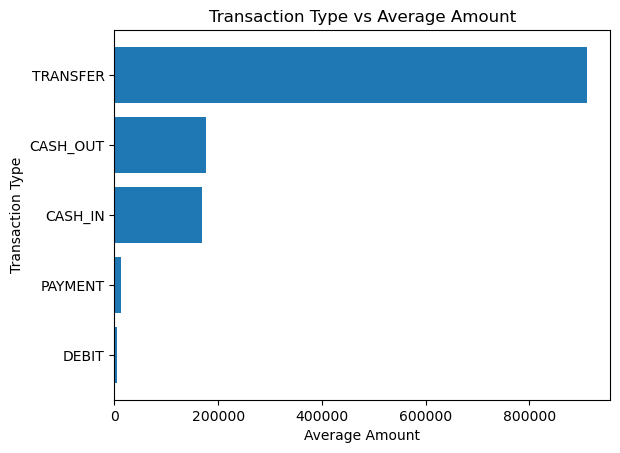

In [5]:
# Creating a bar chart for Transaction Type vs Average Amount
DF = DF.groupby('type').mean().reset_index()

DF = DF.sort_values('amount')

# Create a bar chart
plt.barh(DF['type'], DF['amount'])

# Add labels and title
plt.xlabel('Average Amount')
plt.ylabel('Transaction Type')
plt.title('Transaction Type vs Average Amount')

# Show the chart
plt.show()

----

The chart also shows that the differences in the average amount between the transaction types are quite significant. This could indicate that certain transaction types tend to involve higher values than others.
The bar chart of Transaction Type vs Average Amount provides an informative overview of the transaction data and allows for easy comparison between the different types of transactions.

----

## Top Ten Money Senders
-----
The bar chart represents the total sum of money sent by the top ten money senders. The data used for this visualization has been grouped by the name of the originator and the total amount for each originator has been calculated.
the data is sorted in ascending order and the top 10 records are selected. 

----


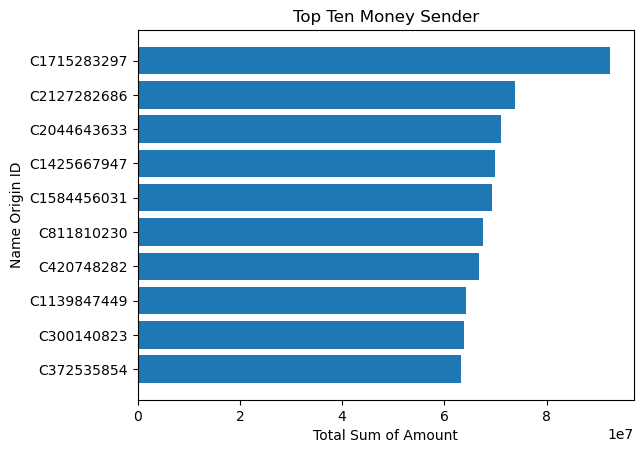

In [38]:
# creating a bar chart for Top Ten Money Sender
DF2 = DF.groupby('nameOrig').sum().reset_index()
DF2 = DF.sort_values('amount', ascending=True).head(10)

# Create a bar chart
plt.barh(DF2['nameOrig'], DF2['amount'])

# Add labels and title
plt.xlabel('Total Sum of Amount')
plt.ylabel('Name Origin ID')
plt.title('Top Ten Money Sender')

# Show the chart
plt.show()

----
The chart shows that the originator with the highest total amount sent is displayed at the top of the chart, with the remaining originators listed in descending order of total amount sent. The other top senders have a sum of an amount ranging from around 60 to 90 million. This visualization can be useful to identify the top customers who generate the most revenue for the company and monitor their transaction activities.


----

## Bar Chart of Top Ten Money Receivers
----
The bar chart represents the total sum of money received by the top ten money receivers. The data used for this visualization has been grouped by the name of the receiver and the total amount for each receiver has been calculated.

-----

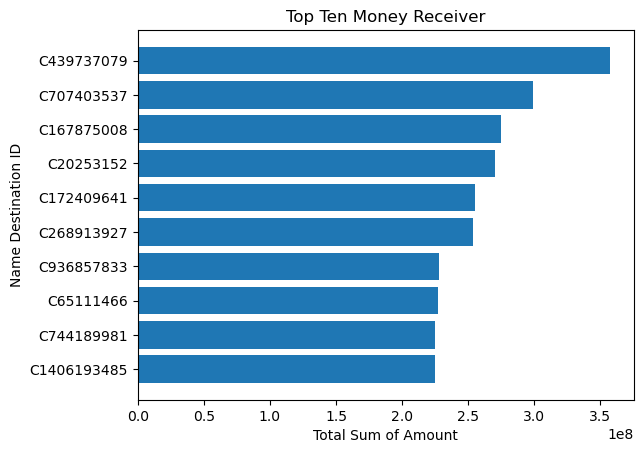

In [7]:
# creating a bar chart for Top Ten Money Receiver
DF = DF.groupby('nameDest').sum().reset_index()

DF = DF.sort_values('amount', ascending=True).tail(10)

# Create a bar chart
plt.barh(DF['nameDest'], DF['amount'])

# Add labels and title
plt.xlabel('Total Sum of Amount')
plt.ylabel('Name Destination ID')
plt.title('Top Ten Money Receiver')

# Show the chart
plt.show()

----

The chart shows that the receiver with the highest total amount received is displayed at the top of the chart, with the remaining receivers listed in descending order of total amount received. The chart allows for easy comparison between the top ten money receivers and provides a clear visualization of the difference in total amounts received between them.


----


----

## Conclusion
----

The dataset consists of, the transaction type, amount, the account from where the money was transferred, the account to which the money was transferred, and the balance of both accounts before and after the transaction.
It was observed that a few accounts were involved in significantly high-value transactions, which could be further investigated to detect fraudulent activities.
the analysis of Dataset for shows the importance of visualizations in understanding and interpreting complex data. The dataset provides valuable information for fraud detection and prevention efforts.The analysis could be employed to improve the accuracy of fraud detection.


----